In [97]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import json
from io import StringIO
import numpy as np

from geodata_fetch.harvest import DataHarvester

import geopandas as gpd
import rasterio
from rasterio.plot import show
import rioxarray

import hvplot.pandas
import hvplot.xarray
import panel

import scipy as sp
import matplotlib.pyplot as plt

In [6]:
output_dir = '/workspace/notebooks/sandbox/data/output-data/raster-viz'

gpd = gpd.read_file('/workspace/notebooks/sandbox/data/input-data/CPES/cpes.shp')
gpd = gpd.to_crs(epsg=4326)

bbox = gpd.total_bounds

geom = gpd.geometry

json_bbox = bbox.tolist()



gpd_lon = (bbox[0] + bbox[2]) / 2
gpd_lat = (bbox[1] + bbox[3]) / 2

centroid = [gpd_lon, gpd_lat]


print(json_bbox)
geom.plot()

AttributeError: 'GeoDataFrame' object has no attribute 'read_file'

In [7]:

slga_layer = "Organic_Carbon"
slga_layer_depth = "0-5cm"

data_mask=True
add_buffer = False
resample=False

# Resolution of data download in arcseconds (1 arcsec ~ 30m)
target_res = 1
target_proj = "EPSG:3857" #find way to set this once at top of notebook and  have it feed through to everything else

date_start = "2022-10-01" #these aren't needed for SLGA but are expected in the package and throw error if excluded - need to fix
date_end = "2022-11-30"
time_intervals = 0 #same issue as above, need to fix in geodata package to be optional.

# layer depth should be in list format to avoid errors and allow for multiple depths later on.
target_sources = {
    "SLGA": {
        slga_layer: [slga_layer_depth]
    }
}

json_data = {
    "property_name":'rasterviz',
    "outpath": output_dir,
    "data_mask": data_mask,
    "target_res": str(target_res),
    "target_crs": target_proj,
    "date_start": date_start if date_start is not None else "2022-10-01", #a date of some kind must be provided or the harvester complains
    "date_end": date_end if date_end is not None else "2022-11-30",
    "target_centroid_lat": gpd_lat,
    "target_centroid_lng": gpd_lon,
    "time_intervals": time_intervals,
    "target_sources": target_sources,
    "target_bbox": json_bbox,
    "add_buffer": add_buffer,
    "resample": resample
}

# Converting dictionary to JSON formatted string
data = json.dumps(json_data)

# Create a file-like object from JSON string
json_file_like = StringIO(data)

In [8]:
harvester = DataHarvester(json_file_like, geom)
harvester.run()

Requested the following 1 sources: ['SLGA']
WCS data downloaded and saved as SLGA_Organic_Carbon_0-5cm_rasterviz.tiff
SLGA data downloaded successfully: ['SLGA_Organic_Carbon_0-5cm_rasterviz']
Masking data in /workspace/notebooks/sandbox/data/output-data/raster-viz
files to mask: ['SLGA_Organic_Carbon_0-5cm_rasterviz.tiff']


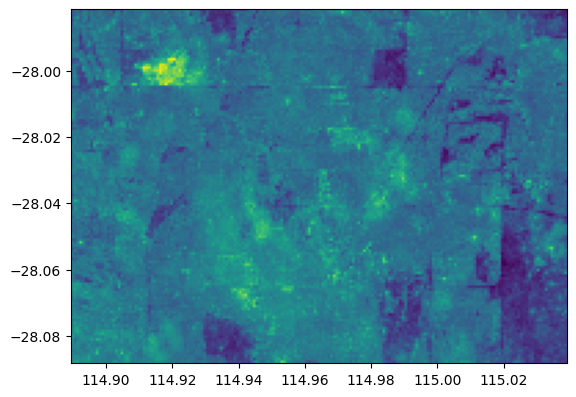

<Axes: >

In [9]:
test_raster = rasterio.open('/workspace/notebooks/sandbox/data/output-data/raster-viz/SLGA_Organic_Carbon_0-5cm_rasterviz.tiff')

show(test_raster)

In [ ]:
# sigma = [0.01,0.01]

# gaussian_filter = sp.ndimage.gaussian_filter(test_raster.read(1), sigma=sigma)

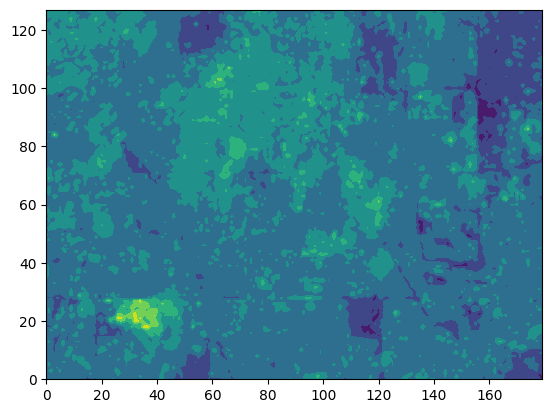

In [10]:
# create contour

img = test_raster.read(1)

contourf = plt.contourf(img, cmap='viridis')

In [11]:
map = hvplot.xarray(test_raster, cmap='viridis', rasterize=True, aspect='equal', frame_width=500, frame_height=500)

TypeError: 'module' object is not callable